# Predict who will pay the loan

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

df = pd.read_csv("desktop/loan_data.csv") #Reading the dataset in a dataframe using Pandas

1- Print the first 5 records of your data

In [2]:
df.head(5) 

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


2-Demonstrate the basic statistics of di erent features, i.e., count, mean, std, min, max, and 25:50:75% percentile

In [3]:
df.describe() 

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9577.000000,9577.000000,9577.000000,9577.000000,9577.000000,9577.000000,9577.000000,9.577000e+03,9577.000000,9577.000000,9577.000000,9577.000000,9577.000000
mean,0.805054,0.122638,319.033619,10.932082,12.606295,710.844106,4560.748482,1.691177e+04,46.798171,1.577007,0.163726,0.062128,0.159967
std,0.396180,0.026848,207.010102,0.614835,6.884227,37.971904,2497.060076,3.375727e+04,29.015745,2.199896,0.546241,0.262139,0.366594
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.210000,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928238,12.660000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.350000,11.291780,17.950000,737.000000,5730.000000,1.824200e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


3- Show the breakup of credit approval status. In our original data, 1 indicates "approved", 0 means "not approved"

In [50]:
print("Approved (1): ", df['credit.policy'].value_counts()[1],
      "\nNot Approved (0): ", df['credit.policy'].value_counts()[0])

Approved (1):  7710 
Not Approved (0):  1867


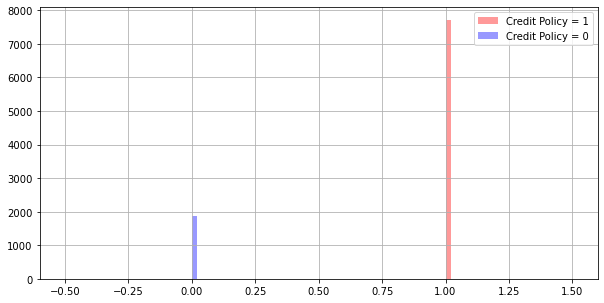

In [55]:

import seaborn as sns
%matplotlib inline
plt.figure(figsize=(10,5))
df[df["credit.policy"] == 1]["credit.policy"].hist(color="red",bins=50,label="Credit Policy = 1",alpha=0.4)
df[df["credit.policy"] == 0]["credit.policy"].hist(color="blue",bins=50,label="Credit Policy = 0",alpha=0.4)
plt.legend()

The above figure shows that around 1867 people are not approved for the loan 
and 7710 people are approved for the loan

4- Plot the histogram of installments by "approved" and "not approved"


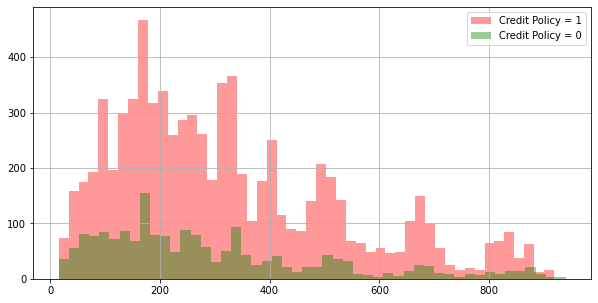

In [56]:

import seaborn as sns
%matplotlib inline
plt.figure(figsize=(10,5))
df[df["credit.policy"] == 1]["installment"].hist(color="red",bins=50,label="Credit Policy = 1",alpha=0.4)
df[df["credit.policy"] == 0]["installment"].hist(color="green",bins=50,label="Credit Policy = 0",alpha=0.4)
plt.legend()



here we make two different histogram one for those who have credit policy 1 score 
and the other for those who have credit policy of 0 score for installment attribute. 

 5- Illustrate with boxplot Fico score varies between "approved" and "not approved" borrowers

<AxesSubplot:title={'center':'fico'}, xlabel='not.fully.paid'>

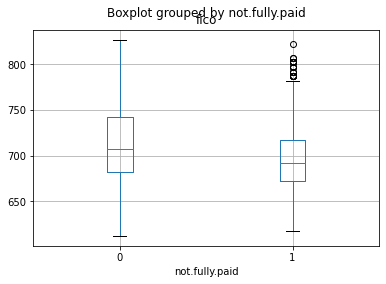

In [53]:
df.boxplot(column='fico',by='not.fully.paid')

# 2.2 Data Preprocessing and Model Construction:  

 2.2.1 Data Preprocessing and Splitting
The “purpose” feature in our dataset takes different nominal values, i.e., “credit card”, “debt consolidation”, “educational”, “major purchase”, “small business”, and “all other”. In this question,please convert them with dummy variables so sklearn can recognize them.More speci cally, it can be expanded into 6 di erent features, with each indicating whether a specialpurpose is served with a boolean value.

In [33]:

#We need to transform "Purpose" culumn to dummy variables 

category_features =['purpose']
final_data = pd.get_dummies(df)
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0,0,0


change the purpose column from a categorical column to dummy variable and see information after that

In [25]:
features = ['purpose']
final_data = pd.get_dummies(df, columns = features, drop_first = True)
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9577 entries, 0 to 9576
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9577 non-null   int64  
 1   int.rate                    9577 non-null   float64
 2   installment                 9577 non-null   float64
 3   log.annual.inc              9577 non-null   float64
 4   dti                         9577 non-null   float64
 5   fico                        9577 non-null   int64  
 6   days.with.cr.line           9577 non-null   float64
 7   revol.bal                   9577 non-null   int64  
 8   revol.util                  9577 non-null   float64
 9   inq.last.6mths              9577 non-null   int64  
 10  delinq.2yrs                 9577 non-null   int64  
 11  pub.rec                     9577 non-null   int64  
 12  not.fully.paid              9577 non-null   int64  
 13  purpose_credit_card         9577 

showing them in a plot

<AxesSubplot:xlabel='purpose', ylabel='count'>

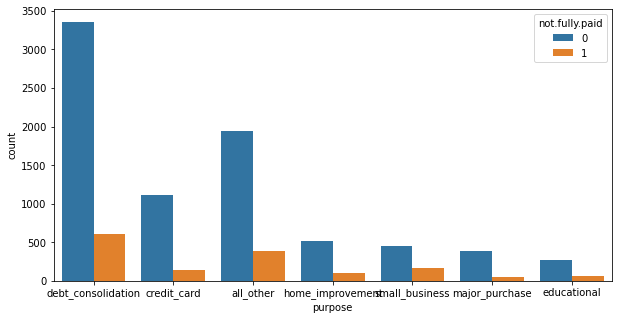

In [38]:
%matplotlib inline
plt.subplots(figsize = (10,5))
sns.countplot(x = 'purpose', hue = 'not.fully.paid', data = df)

To evaluate the e ectiveness of your method, the whole data should be split into two parts. 
In this question, a ratio of70%:  30% is set between training and testing data, i.e., 
you need to randomly select 70% of the data as training, and leavethe rest as testing data.

In [10]:
from sklearn.model_selection import train_test_split

In [43]:
# a ratio of 70% and  30% is set between training and testing data
X = final_data.drop('not.fully.paid', axis = 1)
y = final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

                    2.2.2 Training Decision Tree Model

In this  question,  you  are  expected  to  construct  a  decision  tree  for  decision  making.   Luckily,  you  do  not  need  to  developeverything from scratch.  You should adopt theDecisionTreeClassi erincluded inscikit-learn.  Note that  guring out how touse this implementation,its corresponding attributes and methods is a part of the assignment.Two splitting criteria should be introduced, i.e.,1.  Information Gain,2.  Gini coeficient

splitting criteria : Gini Index

In [45]:
#in decision tree classifier , the default is Gini index 
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [46]:
# creating confusion matrix for comparision
from sklearn.metrics import classification_report, confusion_matrix
predictions = dtree.predict(X_test)
print(classification_report(y_test, predictions), '\n')

print(confusion_matrix(y_test, predictions)) #print confusion matrix when it is for Gini index

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      2422
           1       0.24      0.28      0.26       452

    accuracy                           0.75      2874
   macro avg       0.55      0.56      0.55      2874
weighted avg       0.76      0.75      0.76      2874
 

[[2031  391]
 [ 327  125]]


splitting criteria : Information Gain

In [47]:
#in decision tree classifier , the default is Gini index so We should change it to entropy which is related to information gain
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion="entropy")
dtree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [48]:
# creating confusion matrix for comparision
from sklearn.metrics import classification_report, confusion_matrix
predictions = dtree.predict(X_test)
print(classification_report(y_test, predictions), '\n')

print(confusion_matrix(y_test, predictions)) #print confusion matrix when it is for Information gain

              precision    recall  f1-score   support

           0       0.85      0.84      0.85      2422
           1       0.21      0.23      0.22       452

    accuracy                           0.74      2874
   macro avg       0.53      0.54      0.53      2874
weighted avg       0.75      0.74      0.75      2874
 

[[2027  395]
 [ 346  106]]


2.3 Performance Evaluation and Analysis:
To compare the performance of different approaches, we usually examine our model with testing data using various evaluationmetrics.  In this question, please showconfusion matrix, precision, recall, and f-scoreon both Information Gain andGini based methods.
Finally, to conclude your work, please use concise language to analyze the results based on your observati

Overall the Decision tree based on Gini index performed better than the decision tree based on Information Gain. 
Moreover, in certain cases such as recall,precision and f1-score in all classes 0 and 1, the decision tree based on Gini index performed better than the decision tree based on Information Gain.
